# Feed forward neural networks
Feed forward neural networks are artificial neural networks in which nodes do not form loops. This type of neural network is also known as a multi-layer neural network as all information is only passed forward. During data flow, input nodes receive data, which travel through hidden layers, and exit output nodes.

In this example we will work on the MNIST dataset (digit classification)

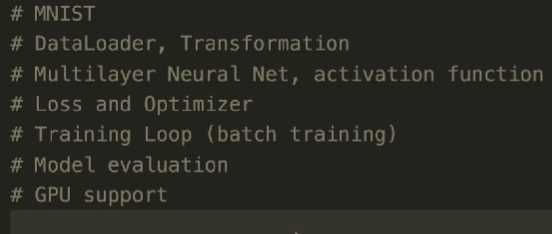

In [16]:
#import all the neccessary packages
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# changing the device to 'GPU'
device =torch.device('cuda' if torch.cuda.is_available() else 'cpu')



In [4]:
#load mnist data

train_dataset=torchvision.datasets.MNIST(root='./data', train=True,
                                         transform=transforms.ToTensor(),download=True)

test_dataset=torchvision.datasets.MNIST(root='./data', train=False,
                                        transform=transforms.ToTensor())


100%|██████████| 9912422/9912422 [00:00<00:00, 93198395.97it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 111235715.17it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24168931.45it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7605001.50it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [10]:
input_size=784 #28*28
hidden_size =100
num_class=10
num_epochs=2
batch_size=100
leaning_rate=0.001


In [11]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=True)

In [14]:
examples=iter(train_loader)
samples,labels=next(examples)
print(samples.size(),labels.shape)
#1 chaneel
#image size 28*28

torch.Size([100, 1, 28, 28]) torch.Size([100])


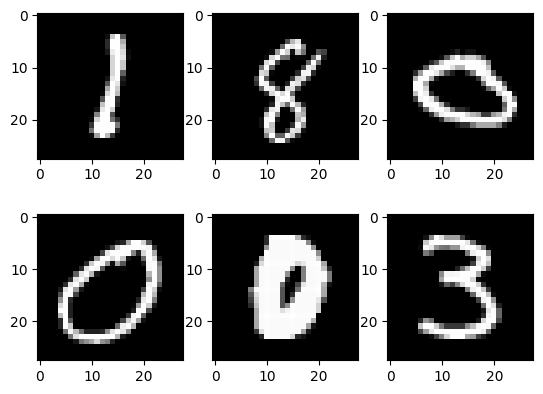

In [19]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap='gray')

In [26]:
#creating class for our network
class neural_net(nn.Module):
    def __init__(self,input_size,hidden_size,num_class):
        super(neural_net,self).__init__()
        self.l1=nn.Linear(input_size,hidden_size)
        self.relu=nn.ReLU()
        self.l2=nn.Linear(hidden_size,num_class)



    def forward(self,x):
        out=self.l1(x)
        out=self.relu(out)
        out=self.l2(out)
        return out

model=neural_net(input_size,hidden_size,num_class)

#declaring loss
loss_fun=nn.CrossEntropyLoss()

#optimizer
opt=torch.optim.Adam(model.parameters(),lr=leaning_rate)



In [27]:
from prompt_toolkit import output
#training the model
total_steps=len(train_loader)
for i in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        images=images.reshape(-1,28*28).to(device)
        labels=labels.to(device)

        #forward pass
        output=model(images)
        loss=loss_fun(output,labels)


        #resetting for the next pass
        opt.zero_grad()
        loss.backward()
        opt.step()

        if(i+1)%100==0:
            print(f'epoch {i+1}/{num_epochs},loss{loss.item():.3f}')





epoch 100/2,loss0.423
epoch 200/2,loss0.437
epoch 300/2,loss0.259
epoch 400/2,loss0.513
epoch 500/2,loss0.264
epoch 600/2,loss0.159
epoch 100/2,loss0.248
epoch 200/2,loss0.101
epoch 300/2,loss0.221
epoch 400/2,loss0.203
epoch 500/2,loss0.195
epoch 600/2,loss0.176


In [28]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 95.18 %
